<a href="https://colab.research.google.com/github/vajihe-ameri/predict-software-bugs-in-java-classes/blob/main/hazelcast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive
drive = drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#***import requirements***#
#-------------------------#
import keras
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.constraints import max_norm
from keras.callbacks import ModelCheckpoint
import numpy
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
file_path = "/content/drive/MyDrive/new_df/best_model.hdf5"

In [6]:
test_features = pd.read_csv("/content/drive/MyDrive/new_df/test_set_hazelcast.csv")
train_features = pd.read_csv("/content/drive/MyDrive/new_df/train_set_hazelcast.csv")
test_target = pd.read_csv("/content/drive/MyDrive/new_df/test_set_NB_hazelcast.csv")
train_target = pd.read_csv("/content/drive/MyDrive/new_df/train_set_NB_hazelcast.csv")

In [7]:
#Create and import new combined dataset features

main_model = keras.models.load_model("/content/drive/MyDrive/new_df/best_model_by_3classes")
test_prediction_points = main_model.predict(test_features)
train_prediction_points = main_model.predict(train_features)
main_model_test_prediction_df = pd.DataFrame (data=test_prediction_points, columns=['main_0_p', 'main_1_p', 'main_2_p'])
main_model_train_prediction_df = pd.DataFrame (data=train_prediction_points, columns=['main_0_p', 'main_1_p', 'main_2_p'])

zero_other_model = keras.models.load_model("/content/drive/MyDrive/new_df/best_model_by_class0")
test_prediction_points = zero_other_model.predict(test_features)
train_prediction_points = zero_other_model.predict(train_features)
zero_other_test_prediction_df = pd.DataFrame ({'0&other': test_prediction_points.ravel()})
zero_other_train_prediction_df = pd.DataFrame ({'0&other': train_prediction_points.ravel()})

one_other_model = keras.models.load_model("/content/drive/MyDrive/new_df/best_model_by_class1")
test_prediction_points = one_other_model.predict(test_features)
train_prediction_points = one_other_model.predict(train_features)
one_other_test_prediction_df = pd.DataFrame ({'1&other': test_prediction_points.ravel()})
one_other_train_prediction_df = pd.DataFrame ({'1&other': train_prediction_points.ravel()})

two_other_model = keras.models.load_model("/content/drive/MyDrive/new_df/best_model_by_class2")
test_prediction_points = two_other_model.predict(test_features)
train_prediction_points = two_other_model.predict(train_features)
two_other_test_prediction_df = pd.DataFrame ({'2&other': test_prediction_points.ravel()})
two_other_train_prediction_df = pd.DataFrame ({'2&other': train_prediction_points.ravel()})

randomForest_model =  RandomForestClassifier(n_estimators=60, max_depth= 15, max_leaf_nodes=70, random_state = 50)
randomForest_model.fit(train_features, train_target.values.ravel())
randomForest_model_test_prediction_df = pd.DataFrame ({'randomForest': randomForest_model.predict(test_features)})
randomForest_model_train_prediction_df = pd.DataFrame ({'randomForest': randomForest_model.predict(train_features)})

svm_model =  SVC()
svm_model.fit(train_features, train_target.values.ravel())
svm_model_test_prediction_df = pd.DataFrame ({'svm': svm_model.predict(test_features)})
svm_model_train_prediction_df = pd.DataFrame ({'svm': svm_model.predict(train_features)})

GaussianNB_model =  GaussianNB()
GaussianNB_model.fit(train_features, train_target.values.ravel())
GaussianNB_model_test_prediction_df = pd.DataFrame ({'GaussianNB': GaussianNB_model.predict(test_features)})
GaussianNB_model_train_prediction_df = pd.DataFrame ({'GaussianNB': GaussianNB_model.predict(train_features)})

#combined new test & train features
test_features = pd.concat([main_model_test_prediction_df, zero_other_test_prediction_df, one_other_test_prediction_df, two_other_test_prediction_df, randomForest_model_test_prediction_df, svm_model_test_prediction_df, GaussianNB_model_test_prediction_df, GaussianNB_model_test_prediction_df], axis=1)
train_features = pd.concat([main_model_train_prediction_df, zero_other_train_prediction_df, one_other_train_prediction_df, two_other_train_prediction_df, randomForest_model_train_prediction_df, randomForest_model_train_prediction_df, svm_model_train_prediction_df, GaussianNB_model_train_prediction_df], axis=1)

524/524 [==============================] - 3s 5ms/step


In [8]:
!pip install tensorflow-addons
import tensorflow_addons
f_measure = tensorflow_addons.metrics.F1Score(num_classes=2, average='micro', threshold=0.5)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.1/612.1 kB 5.4 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [9]:
#***Build Model***#
#-----------------#
model = Sequential()

model.add(Dense(90, kernel_initializer = 'uniform', activation = 'relu', input_dim = train_features.shape[1]))
model.add(Dense(70, kernel_initializer = 'uniform', kernel_constraint=max_norm(2.), activation = 'relu'))
model.add(Dense(50, kernel_initializer = 'uniform', kernel_constraint=max_norm(2.), activation = 'relu'))
model.add(Dense(30, kernel_initializer = 'uniform', kernel_constraint=max_norm(2.), activation = 'relu'))
model.add(Dense(10, kernel_initializer = 'uniform', kernel_constraint=max_norm(2.), activation = 'relu'))
model.add(Dense(3, kernel_initializer = 'uniform', activation = 'softmax'))

model.compile(optimizer= 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

checkpoint = ModelCheckpoint(file_path, monitor='loss', verbose=1,save_best_only=True, mode='auto', period=100)

#model.summary()

Epoch 1/1000
23/23 [==============================] - 2s 19ms/step - loss: 1.0947 - accuracy: 0.4084 - val_loss: 1.1387 - val_accuracy: 0.0000e+00
Epoch 2/1000
23/23 [==============================] - 0s 8ms/step - loss: 1.0744 - accuracy: 0.4167 - val_loss: 1.6445 - val_accuracy: 0.0000e+00
Epoch 3/1000
23/23 [==============================] - 0s 8ms/step - loss: 1.0379 - accuracy: 0.4170 - val_loss: 1.7035 - val_accuracy: 0.0000e+00
Epoch 4/1000
23/23 [==============================] - 0s 14ms/step - loss: 1.0044 - accuracy: 0.4167 - val_loss: 1.6313 - val_accuracy: 0.0000e+00
Epoch 5/1000
23/23 [==============================] - 0s 15ms/step - loss: 0.9820 - accuracy: 0.4170 - val_loss: 1.5543 - val_accuracy: 0.0000e+00
Epoch 6/1000
23/23 [==============================] - 0s 13ms/step - loss: 0.9772 - accuracy: 0.4384 - val_loss: 1.5820 - val_accuracy: 0.0000e+00
Epoch 7/1000
23/23 [==============================] - 1s 24ms/step - loss: 0.9748 - accuracy: 0.4374 - val_loss: 1.5202 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


23/23 [==============================] - 1s 41ms/step - loss: 0.9447 - accuracy: 0.5158 - val_loss: 1.4660 - val_accuracy: 0.3118
Epoch 101/1000
23/23 [==============================] - 0s 13ms/step - loss: 0.9445 - accuracy: 0.5140 - val_loss: 1.4175 - val_accuracy: 0.4892
Epoch 102/1000
23/23 [==============================] - 0s 14ms/step - loss: 0.9449 - accuracy: 0.5140 - val_loss: 1.4062 - val_accuracy: 0.5502
Epoch 103/1000
23/23 [==============================] - 0s 14ms/step - loss: 0.9443 - accuracy: 0.5152 - val_loss: 1.5025 - val_accuracy: 0.3943
Epoch 104/1000
23/23 [==============================] - 0s 13ms/step - loss: 0.9444 - accuracy: 0.5149 - val_loss: 1.4129 - val_accuracy: 0.5520
Epoch 105/1000
23/23 [==============================] - 0s 14ms/step - loss: 0.9441 - accuracy: 0.5160 - val_loss: 1.5419 - val_accuracy: 0.1332
Epoch 106/1000
23/23 [==============================] - 0s 13ms/step - loss: 0.9449 - accuracy: 0.5131 - val_loss: 1.4483 - val_accuracy: 0.3073


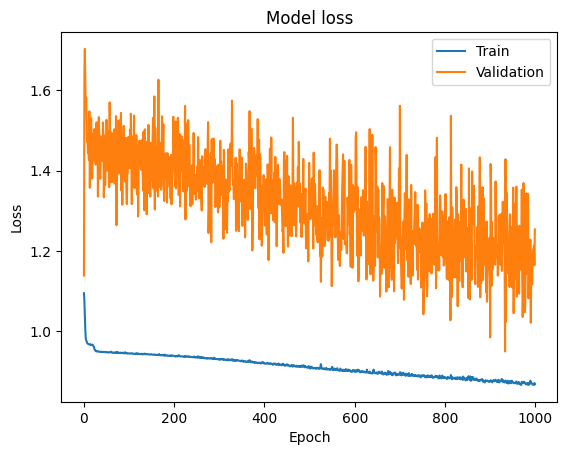



*********************************************




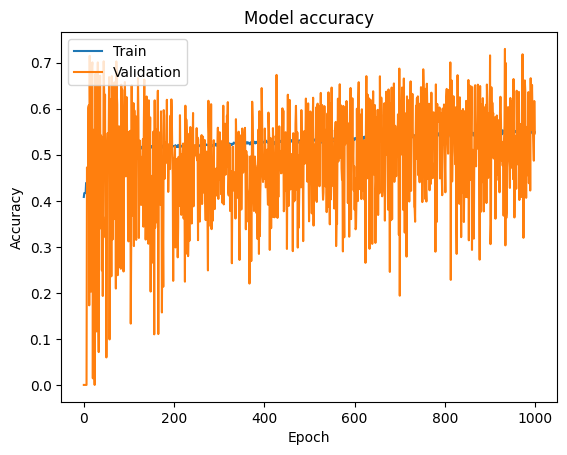



*********************************************
Test-set evaluate result:

93/93 [==============================] - 0s 2ms/step - loss: 1.3510 - accuracy: 0.4313
[1.351004958152771, 0.43127962946891785]
93/93 [==============================] - 0s 2ms/step
Report for test set:

               precision    recall  f1-score   support

     class 0       0.51      0.58      0.55      1363
     class 1       0.37      0.31      0.34      1097
     class 2       0.28      0.27      0.27       494

    accuracy                           0.43      2954
   macro avg       0.39      0.39      0.39      2954
weighted avg       0.42      0.43      0.42      2954



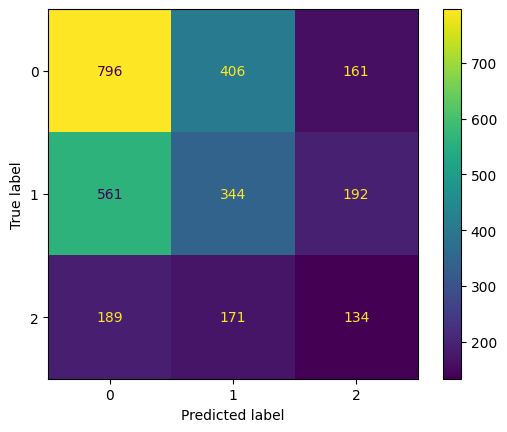



*********************************************
Train-set evaluate result:

524/524 [==============================] - 1s 2ms/step - loss: 0.9403 - accuracy: 0.5542
[0.9402670860290527, 0.5542413592338562]
524/524 [==============================] - 1s 2ms/step
Report for train set:

               precision    recall  f1-score   support

     class 0       0.54      0.63      0.58      5580
     class 1       0.46      0.49      0.48      5580
     class 2       0.70      0.54      0.61      5580

    accuracy                           0.55     16740
   macro avg       0.57      0.55      0.56     16740
weighted avg       0.57      0.55      0.56     16740



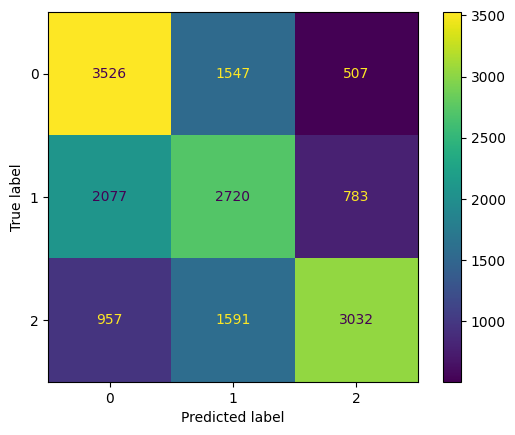

In [10]:
#***Model First Try Learning***#
#------------------------------#

history = model.fit(train_features, train_target['Number of Bugs'], batch_size = 600, epochs = 1000,  validation_split = 0.2 , callbacks=[checkpoint])

print("\n\n*********************************************\n\n")

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.show()

print("\n\n*********************************************\n\n")

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

############Pridecting results show######################

target_names = ['class 0', 'class 1', 'class 2']

print("\n\n*********************************************\nTest-set evaluate result:\n")

print(model.evaluate(test_features, test_target))
test_prediction_points = model.predict(test_features)  #Probability of each class
test_prediction = numpy.argmax(test_prediction_points, axis=1)

print("Report for test set:\n\n", classification_report(test_target, test_prediction, target_names=target_names))
test_confusion_matrix = confusion_matrix(test_target, test_prediction)
test_disp = ConfusionMatrixDisplay(confusion_matrix=test_confusion_matrix)
test_disp.plot()
plt.show()

print("\n\n*********************************************\nTrain-set evaluate result:\n")

print(model.evaluate(train_features, train_target))
train_prediction_points = model.predict(train_features)  #Probability of each class
train_prediction = numpy.argmax(train_prediction_points, axis=1)

print("Report for train set:\n\n", classification_report(train_target, train_prediction, target_names=target_names))
train_confusion_matrix = confusion_matrix(train_target, train_prediction)
train_disp = ConfusionMatrixDisplay(confusion_matrix=train_confusion_matrix)
train_disp.plot()
plt.show()

Epoch 1/1000
2/2 [==============================] - 0s 180ms/step - loss: 0.8628 - accuracy: 0.5560 - val_loss: 1.2591 - val_accuracy: 0.5573
Epoch 2/1000
2/2 [==============================] - 0s 84ms/step - loss: 0.8641 - accuracy: 0.5538 - val_loss: 1.1570 - val_accuracy: 0.6240
Epoch 3/1000
2/2 [==============================] - 0s 109ms/step - loss: 0.8623 - accuracy: 0.5536 - val_loss: 1.1319 - val_accuracy: 0.5989
Epoch 4/1000
2/2 [==============================] - 0s 86ms/step - loss: 0.8595 - accuracy: 0.5556 - val_loss: 1.2013 - val_accuracy: 0.5284
Epoch 5/1000
2/2 [==============================] - 0s 95ms/step - loss: 0.8579 - accuracy: 0.5577 - val_loss: 1.2132 - val_accuracy: 0.5305
Epoch 6/1000
2/2 [==============================] - 0s 90ms/step - loss: 0.8569 - accuracy: 0.5583 - val_loss: 1.1291 - val_accuracy: 0.6075
Epoch 7/1000
2/2 [==============================] - 0s 99ms/step - loss: 0.8569 - accuracy: 0.5589 - val_loss: 1.1066 - val_accuracy: 0.6257
Epoch 8/100

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 54ms/step - loss: 0.8476 - accuracy: 0.5632 - val_loss: 1.1225 - val_accuracy: 0.5806
Epoch 103/1000
2/2 [==============================] - 0s 66ms/step - loss: 0.8476 - accuracy: 0.5647 - val_loss: 1.1436 - val_accuracy: 0.5499
Epoch 104/1000
2/2 [==============================] - 0s 65ms/step - loss: 0.8475 - accuracy: 0.5632 - val_loss: 1.1542 - val_accuracy: 0.5355
Epoch 105/1000
2/2 [==============================] - 0s 60ms/step - loss: 0.8475 - accuracy: 0.5636 - val_loss: 1.1320 - val_accuracy: 0.5535
Epoch 106/1000
2/2 [==============================] - 0s 57ms/step - loss: 0.8475 - accuracy: 0.5641 - val_loss: 1.1457 - val_accuracy: 0.5415
Epoch 107/1000
2/2 [==============================] - 0s 54ms/step - loss: 0.8474 - accuracy: 0.5641 - val_loss: 1.1481 - val_accuracy: 0.5397
Epoch 108/1000
2/2 [==============================] - 0s 58ms/step - loss: 0.8474 - accuracy: 0.5631 - val_loss: 1.1386 - val_accuracy: 0.5493
Epoch 109/1000

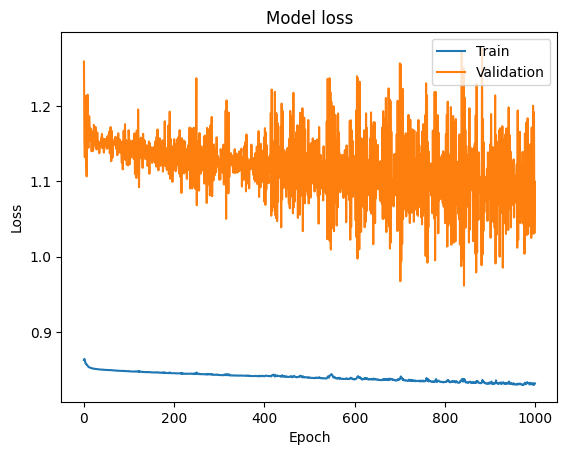



*********************************************




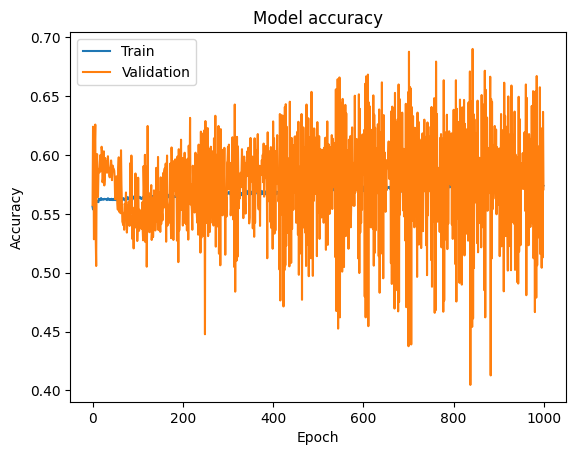



*********************************************
Test-set evaluate result:

93/93 [==============================] - 0s 2ms/step - loss: 1.5093 - accuracy: 0.4188
[1.5092542171478271, 0.4187542200088501]
93/93 [==============================] - 0s 2ms/step
Report for test set:

               precision    recall  f1-score   support

     class 0       0.51      0.57      0.53      1363
     class 1       0.36      0.31      0.33      1097
     class 2       0.26      0.26      0.26       494

    accuracy                           0.42      2954
   macro avg       0.38      0.38      0.37      2954
weighted avg       0.41      0.42      0.41      2954



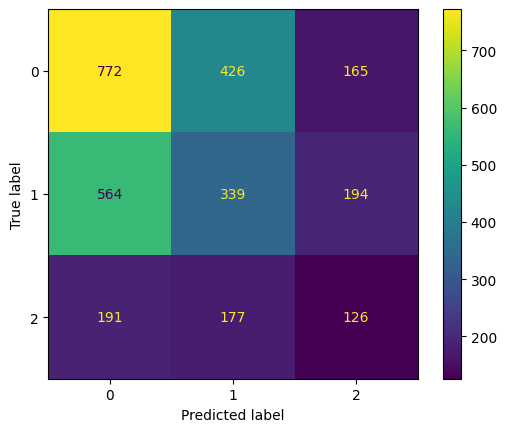



*********************************************
Train-set evaluate result:

524/524 [==============================] - 1s 2ms/step - loss: 0.8828 - accuracy: 0.5747
[0.8827767372131348, 0.574731171131134]
524/524 [==============================] - 1s 2ms/step
Report for train set:

               precision    recall  f1-score   support

     class 0       0.55      0.64      0.59      5580
     class 1       0.48      0.51      0.49      5580
     class 2       0.74      0.57      0.65      5580

    accuracy                           0.57     16740
   macro avg       0.59      0.57      0.58     16740
weighted avg       0.59      0.57      0.58     16740



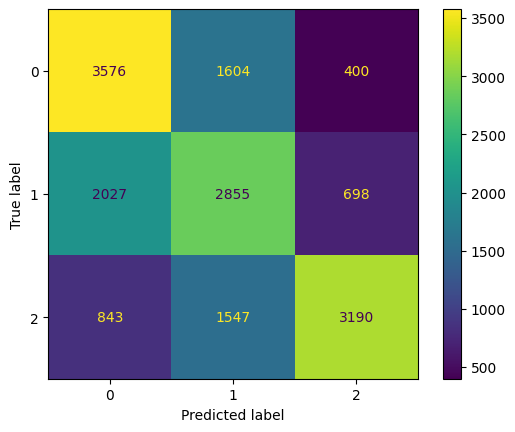

In [11]:
#***Model Continue Learning***#
#------------------------------#

model.load_weights(file_path)

history = model.fit(train_features, train_target['Number of Bugs'], batch_size = 8224, epochs = 1000,  validation_split = 0.2 , callbacks=[checkpoint])

print("\n\n*********************************************\n\n")

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.show()

print("\n\n*********************************************\n\n")

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

############Pridecting results show######################

target_names = ['class 0', 'class 1', 'class 2']

print("\n\n*********************************************\nTest-set evaluate result:\n")

print(model.evaluate(test_features, test_target))
test_prediction_points = model.predict(test_features)  #Probability of each class
test_prediction = numpy.argmax(test_prediction_points, axis=1)

print("Report for test set:\n\n", classification_report(test_target, test_prediction, target_names=target_names))
test_confusion_matrix = confusion_matrix(test_target, test_prediction)
test_disp = ConfusionMatrixDisplay(confusion_matrix=test_confusion_matrix)
test_disp.plot()
plt.show()

print("\n\n*********************************************\nTrain-set evaluate result:\n")

print(model.evaluate(train_features, train_target))
train_prediction_points = model.predict(train_features)  #Probability of each class
train_prediction = numpy.argmax(train_prediction_points, axis=1)

print("Report for train set:\n\n", classification_report(train_target, train_prediction, target_names=target_names))
train_confusion_matrix = confusion_matrix(train_target, train_prediction)
train_disp = ConfusionMatrixDisplay(confusion_matrix=train_confusion_matrix)
train_disp.plot()
plt.show()

In [12]:
checkpoint.best

0.8315632939338684

Test-set evaluate result:

93/93 [==============================] - 0s 2ms/step - loss: 1.5093 - accuracy: 0.4188
[1.5092542171478271, 0.4187542200088501]
93/93 [==============================] - 0s 2ms/step
Report for test set:

               precision    recall  f1-score   support

     class 0       0.51      0.57      0.53      1363
     class 1       0.36      0.31      0.33      1097
     class 2       0.26      0.26      0.26       494

    accuracy                           0.42      2954
   macro avg       0.38      0.38      0.37      2954
weighted avg       0.41      0.42      0.41      2954



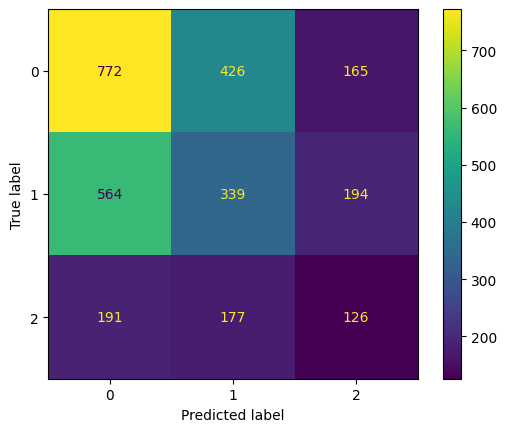



*********************************************
Train-set evaluate result:

524/524 [==============================] - 1s 2ms/step - loss: 0.8828 - accuracy: 0.5747
[0.8827767372131348, 0.574731171131134]
524/524 [==============================] - 1s 2ms/step
Report for train set:

               precision    recall  f1-score   support

     class 0       0.55      0.64      0.59      5580
     class 1       0.48      0.51      0.49      5580
     class 2       0.74      0.57      0.65      5580

    accuracy                           0.57     16740
   macro avg       0.59      0.57      0.58     16740
weighted avg       0.59      0.57      0.58     16740



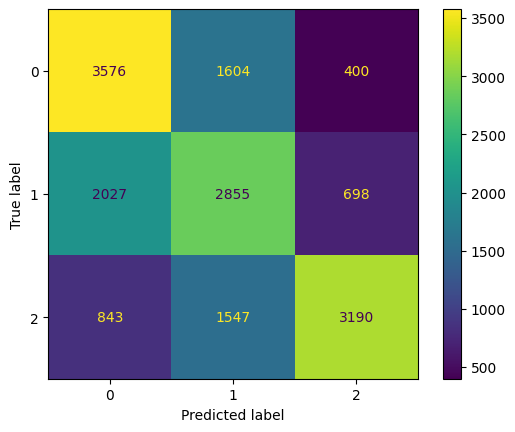

In [13]:
#***Best Model Test Only***#
#--------------------------#

model.load_weights(file_path)

############Pridecting results show######################

target_names = ['class 0', 'class 1', 'class 2']

print("Test-set evaluate result:\n")

print(model.evaluate(test_features, test_target))
test_prediction_points = model.predict(test_features)  #Probability of each class
test_prediction = numpy.argmax(test_prediction_points, axis=1)

print("Report for test set:\n\n", classification_report(test_target, test_prediction, target_names=target_names))
test_confusion_matrix = confusion_matrix(test_target, test_prediction)
test_disp = ConfusionMatrixDisplay(confusion_matrix=test_confusion_matrix)
test_disp.plot()
plt.show()

print("\n\n*********************************************\nTrain-set evaluate result:\n")

print(model.evaluate(train_features, train_target))
train_prediction_points = model.predict(train_features)  #Probability of each class
train_prediction = numpy.argmax(train_prediction_points, axis=1)

print("Report for train set:\n\n", classification_report(train_target, train_prediction, target_names=target_names))
train_confusion_matrix = confusion_matrix(train_target, train_prediction)
train_disp = ConfusionMatrixDisplay(confusion_matrix=train_confusion_matrix)
train_disp.plot()
plt.show()